In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [3]:
df = pd.read_csv('from2009.csv')
df

,Year,Population,Male,Male_Age(0-10),Male_Age(10-20),Male_Age(20-30),Male_Age(30-40),Male_Age(40-50),Male_Age(50-60),Male_Age(60-70),...,Death Coef(Male),Death Coef(Female),Total Number of Death,Death Coef(Child),Death Coef(Boys),Death Coef(Girls),Number of Arrivals,Number of Deaprtures,Migration Difference,Total Migration Difference
0,2009,1361877,625644,89334.0,102450.0,141017.0,100169.0,82217.0,57734.0,29312.0,...,"9,06","7,29",11148.0,"16,31","17,27","15,29",2886.0,2795.0,91.0,14448.0
1,2010,1390610,637764,95161.0,94449.0,147895.0,103029.0,83191.0,59499.0,30048.0,...,"9,51","7,53",11826.0,"17,08","19,87","14,08",2894.0,2524.0,370.0,8833.0
2,2011,1413152,646872,100442.0,87203.0,151700.0,105493.0,83461.0,62063.0,31005.0,...,"9,04","7,12",11446.0,"17,05","18,55","15,42",3167.0,3046.0,121.0,22465.0
3,2012,1449366,660748,105964.0,84186.0,156334.0,107974.0,83869.0,64377.0,32069.0,...,"8,69","6,84",11230.0,"12,60","13,70","11,43",2789.0,2935.0,-146.0,9875.0
4,2013,1474849,671973,112335.0,79484.0,158616.0,110798.0,84664.0,66304.0,33834.0,...,"8,17","6,49",10819.0,"10,50","12,34","8,54",1848.0,2039.0,-191.0,15558.0
5,2014,1506899,686681,118202.0,79391.0,159218.0,114085.0,85692.0,68438.0,36213.0,...,"7,96","6,43",11049.0,"8,27","9,18","7,28",1816.0,2413.0,-597.0,21992.0
6,2015,1641444,750417,131808.0,87043.0,167420.0,126831.0,93654.0,75528.0,41772.0,...,"7,09","5,68",10579.0,"8,99","9,68","8,25",1707.0,2880.0,-1173.0,40742.0
7,2016,1702766,778823,139723.0,90801.0,170195.0,132967.0,96233.0,77778.0,44595.0,...,"6,88","5,72",10794.0,"7,58","8,70","6,39",1783.0,3719.0,-1936.0,27632.0
8,2017,1751308,800421,145438.0,92740.0,169009.0,140315.0,99247.0,79437.0,46799.0,...,"6,70","5,69",10935.0,"6,93","7,40","6,42",1731.0,3535.0,-1804.0,30197.0
9,2018,1801993,822587,151868.0,96433.0,164319.0,149947.0,101774.0,80743.0,48671.0,...,"6,78","6,06",11678.0,"8,36","9,34","7,32",1449.0,3545.0,-2096.0,31082.0


In [12]:
coef_columns = ['Birth Coef', 'Death Coef', 'Death Coef(Male)', 'Death Coef(Female)', 'Death Coef(Child)', 'Death Coef(Boys)', 'Death Coef(Girls)']
for coef in coef_columns:
    df[coef] = df[coef].str.replace(',', '.').astype(float)
df

,Year,Population,Male,Male_Age(0-10),Male_Age(10-20),Male_Age(20-30),Male_Age(30-40),Male_Age(40-50),Male_Age(50-60),Male_Age(60-70),...,Death Coef(Male),Death Coef(Female),Total Number of Death,Death Coef(Child),Death Coef(Boys),Death Coef(Girls),Number of Arrivals,Number of Deaprtures,Migration Difference,Total Migration Difference
0,2009,1361877,625644,89334.0,102450.0,141017.0,100169.0,82217.0,57734.0,29312.0,...,9.06,7.29,11148.0,16.31,17.27,15.29,2886.0,2795.0,91.0,14448.0
1,2010,1390610,637764,95161.0,94449.0,147895.0,103029.0,83191.0,59499.0,30048.0,...,9.51,7.53,11826.0,17.08,19.87,14.08,2894.0,2524.0,370.0,8833.0
2,2011,1413152,646872,100442.0,87203.0,151700.0,105493.0,83461.0,62063.0,31005.0,...,9.04,7.12,11446.0,17.05,18.55,15.42,3167.0,3046.0,121.0,22465.0
3,2012,1449366,660748,105964.0,84186.0,156334.0,107974.0,83869.0,64377.0,32069.0,...,8.69,6.84,11230.0,12.60,13.70,11.43,2789.0,2935.0,-146.0,9875.0
4,2013,1474849,671973,112335.0,79484.0,158616.0,110798.0,84664.0,66304.0,33834.0,...,8.17,6.49,10819.0,10.50,12.34,8.54,1848.0,2039.0,-191.0,15558.0
5,2014,1506899,686681,118202.0,79391.0,159218.0,114085.0,85692.0,68438.0,36213.0,...,7.96,6.43,11049.0,8.27,9.18,7.28,1816.0,2413.0,-597.0,21992.0
6,2015,1641444,750417,131808.0,87043.0,167420.0,126831.0,93654.0,75528.0,41772.0,...,7.09,5.68,10579.0,8.99,9.68,8.25,1707.0,2880.0,-1173.0,40742.0
7,2016,1702766,778823,139723.0,90801.0,170195.0,132967.0,96233.0,77778.0,44595.0,...,6.88,5.72,10794.0,7.58,8.70,6.39,1783.0,3719.0,-1936.0,27632.0
8,2017,1751308,800421,145438.0,92740.0,169009.0,140315.0,99247.0,79437.0,46799.0,...,6.70,5.69,10935.0,6.93,7.40,6.42,1731.0,3535.0,-1804.0,30197.0
9,2018,1801993,822587,151868.0,96433.0,164319.0,149947.0,101774.0,80743.0,48671.0,...,6.78,6.06,11678.0,8.36,9.34,7.32,1449.0,3545.0,-2096.0,31082.0


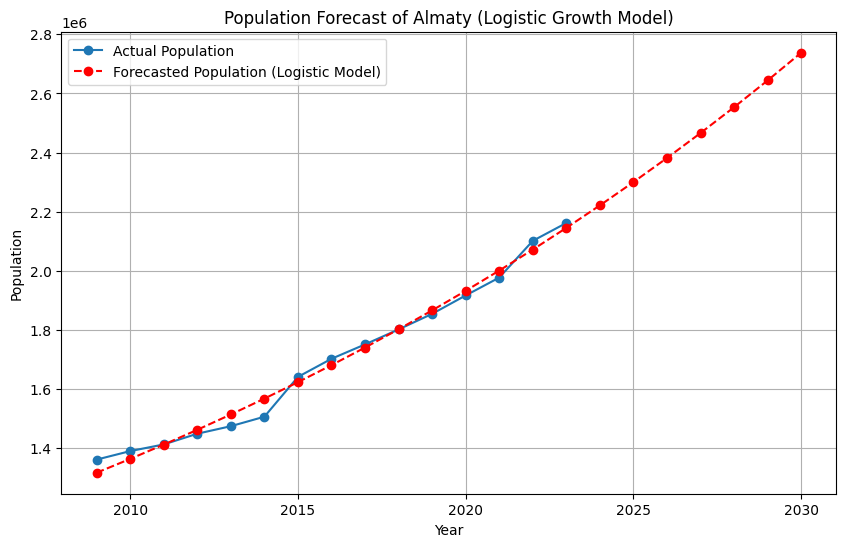

In [6]:
import matplotlib.pyplot as plt
population_data = df[['Year', 'Population']]

# Set the Year column as the index
population_data.set_index('Year', inplace=True)

# Logistic growth function
def logistic_growth(t, P0, r, K):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Extract the years and population data for curve fitting
years = np.array(population_data.index)
population = np.array(population_data['Population'])

# Fit the logistic growth model to the data
params, _ = curve_fit(logistic_growth, years - years[0], population, p0=[population[0], 0.1, max(population) * 2])

# Extract the estimated parameters
P0, r, K = params

# Forecast the population using the logistic growth model up to 2030
forecast_years = np.arange(years[0], 2031)
forecast_population = logistic_growth(forecast_years - years[0], P0, r, K)

# Create a DataFrame for the forecast results
forecast_df_logistic = pd.DataFrame({'Year': forecast_years, 'Forecasted Population': forecast_population})

# Plot the actual data and the logistic growth forecast
plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o', linestyle='-', label='Actual Population')
plt.plot(forecast_df_logistic['Year'], forecast_df_logistic['Forecasted Population'], marker='o', linestyle='--', color='red', label='Forecasted Population (Logistic Model)')
plt.title('Population Forecast of Almaty (Logistic Growth Model)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

forecast_df_logistic.to_csv('forecasted_population.csv', index=False)

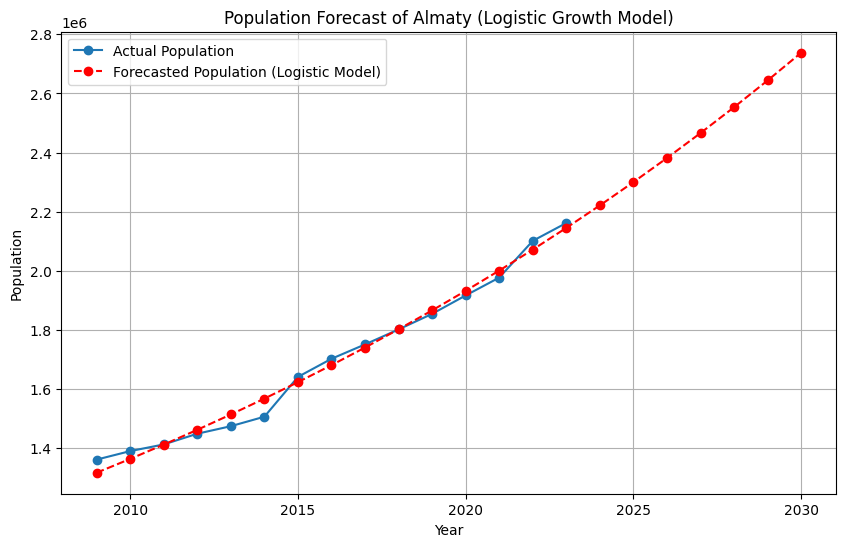

In [9]:
population_data = df[['Year', 'Population']]

# Set the Year column as the index
population_data.set_index('Year', inplace=True)

# Logistic growth function
def logistic_growth(t, P0, r, K):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Extract the years and population data for curve fitting
years = np.array(population_data.index)
population = np.array(population_data['Population'])

# Fit the logistic growth model to the data
params, _ = curve_fit(logistic_growth, years - years[0], population, p0=[population[0], 0.1, max(population) * 2])

# Extract the estimated parameters
P0, r, K = params

# Forecast the population using the logistic growth model up to 2030
forecast_years = np.arange(years[0], 2031)
forecast_population = logistic_growth(forecast_years - years[0], P0, r, K)

# Create a DataFrame for the forecast results
forecast_df_logistic = pd.DataFrame({'Year': forecast_years, 'Forecasted Population': forecast_population})

# Plot the actual data and the logistic growth forecast
plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o', linestyle='-', label='Actual Population')
plt.plot(forecast_df_logistic['Year'], forecast_df_logistic['Forecasted Population'], marker='o', linestyle='--', color='red', label='Forecasted Population (Logistic Model)')
plt.title('Population Forecast of Almaty (Logistic Growth Model)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()



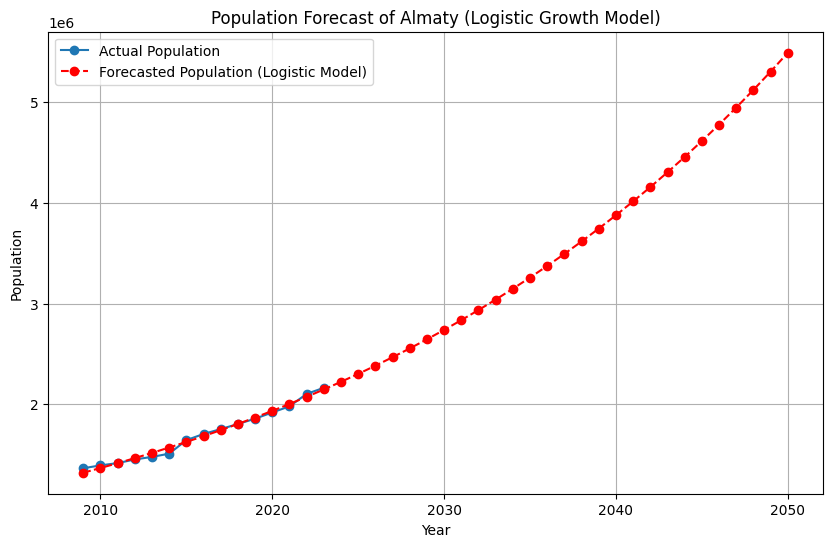

In [56]:
population_data = df[['Year', 'Population']]
birth_rate_data = df['Birth Coef']  # Replace with the actual column name for birth rate
death_rate_data = df['Death Coef']  # Replace with the actual column name for death rate

population_data.set_index('Year', inplace=True)

# Calculate the average growth rate (birth rate minus death rate)
growth_rate_data = birth_rate_data - death_rate_data

# Convert growth rates to a proportional value (per capita)
population_avg = population_data['Population'].mean()
average_growth_rate = (growth_rate_data.mean() / population_avg)

# Logistic growth function
def logistic_growth(t, P0, r, K):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Extract the years and population data for curve fitting
years = np.array(population_data.index)
population = np.array(population_data['Population'])

# Use a reasonable initial estimate for carrying capacity
initial_K = max(population) * 2

# Fit the logistic growth model to the data
params, _ = curve_fit(logistic_growth, years - years[0], population, p0=[population[0], average_growth_rate, initial_K])

# Extract the estimated parameters
P0, r, K = params

# Forecast the population using the logistic growth model up to 2050
forecast_years = np.arange(years[0], 2051)
forecast_population = logistic_growth(forecast_years - years[0], P0, r, K)

# Create a DataFrame for the forecast results
forecast_df_logistic = pd.DataFrame({'Year': forecast_years, 'Forecasted Population': forecast_population})


# Plot the actual data and the logistic growth forecast
plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o', linestyle='-', label='Actual Population')
plt.plot(forecast_df_logistic['Year'], forecast_df_logistic['Forecasted Population'], marker='o', linestyle='--', color='red', label='Forecasted Population (Logistic Model)')
plt.title('Population Forecast of Almaty (Logistic Growth Model)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
official_data = pd.read_csv('Офиц,Данные(Енбек.кз) - Sheet1.csv')
official_data['Population'] = official_data['Population'].str.replace(' ', '').str.replace(',', '.').astype(float) * 1000
official_data

,Year,Population
0,2022,2126900.0
1,2023,2177900.0
2,2024,2229300.0
3,2025,2280900.0
4,2026,2332700.0
5,2027,2384500.0
6,2028,2436300.0
7,2029,2488000.0
8,2030,2539600.0
9,2031,2591200.0


In [40]:
# Extract the years and population values from the official data
official_years = official_data['Year'].astype(int)
official_population = official_data['Population']


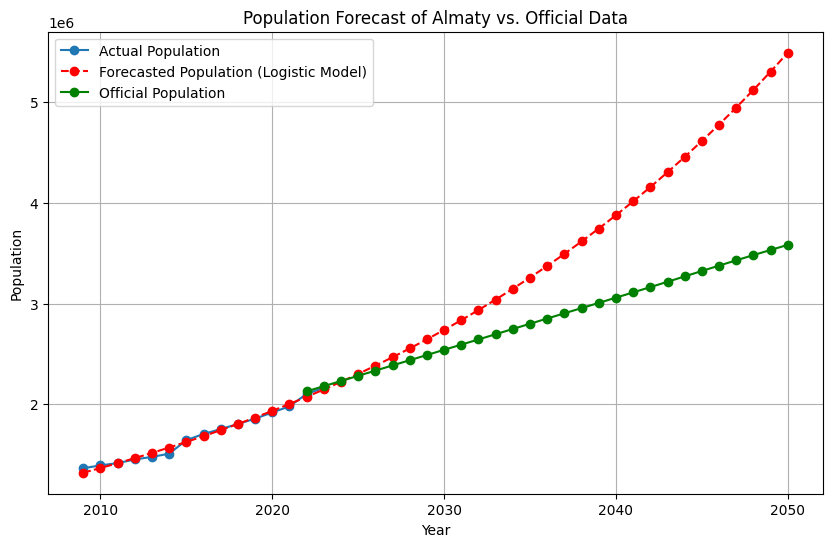

In [41]:
forecast_comparison = forecast_df_logistic[forecast_df_logistic['Year'].isin(official_years)]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Year': official_years,
    'Official Population': official_population,
    'Forecasted Population': forecast_comparison['Forecasted Population'].values
})

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o', linestyle='-', label='Actual Population')
plt.plot(forecast_df_logistic['Year'], forecast_df_logistic['Forecasted Population'], marker='o', linestyle='--', color='red', label='Forecasted Population (Logistic Model)')
plt.plot(comparison_df['Year'], comparison_df['Official Population'], marker='o', linestyle='-', color='green', label='Official Population')
plt.title('Population Forecast of Almaty vs. Official Data')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
population_data = df[['Year', 'Population']]
print(population_data)

    Year  Population
0   2009     1361877
1   2010     1390610
2   2011     1413152
3   2012     1449366
4   2013     1474849
5   2014     1506899
6   2015     1641444
7   2016     1702766
8   2017     1751308
9   2018     1801993
10  2019     1854656
11  2020     1916822
12  2021     1977258
13  2022     2101485
14  2023     2161902


In [63]:
from statsmodels.tsa.arima.model import ARIMA
population_data = df[['Year', 'Population']]

# Set the Year column as the index
population_data.set_index('Year', inplace=True)

# Fit ARIMA model
model = ARIMA(population_data, order=(1, 1, 1))
model_fit = model.fit()

# Display the model summary to check for fitting issues
print(model_fit.summary())

forecast_steps = 2050 - population_data.index[-1] + 1
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = range(population_data.index[-1] + 1, 2051)
forecast_df_arima = pd.DataFrame(forecast, index=forecast_years, columns=['Forecasted Population'])

/home/agytai/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/agytai/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/agytai/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/agytai/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/agytai/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Li

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -166.258
Date:                Mon, 17 Jun 2024   AIC                            338.516
Time:                        20:23:43   BIC                            340.433
Sample:                             0   HQIC                           338.338
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.045     22.374      0.000       0.912       1.087
ma.L1         -0.9963      0.523     -1.904      0.057      -2.022       0.029
sigma2       1.73e+09   1.74e-10   9.96e+18      0.0

/home/agytai/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/agytai/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


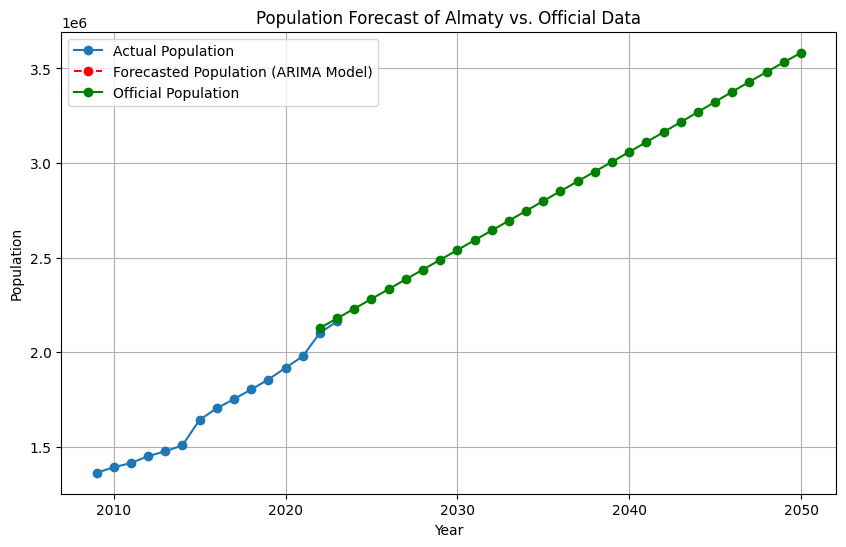

In [64]:
forecast_comparison = forecast_df_arima.loc[forecast_df_arima.index.intersection(official_years)]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Year': official_years,
    'Official Population': official_population,
    'Forecasted Population': [forecast_df_arima.loc[year, 'Forecasted Population'] if year in forecast_df_arima.index else np.nan for year in official_years]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(population_data.index, population_data['Population'], marker='o', linestyle='-', label='Actual Population')
plt.plot(forecast_df_arima.index, forecast_df_arima['Forecasted Population'], marker='o', linestyle='--', color='red', label='Forecasted Population (ARIMA Model)')
plt.plot(comparison_df['Year'], comparison_df['Official Population'], marker='o', linestyle='-', color='green', label='Official Population')
plt.title('Population Forecast of Almaty vs. Official Data')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()